# Create a TMAP view of similarity pairwise

In [1]:
import pandas as pd
import tmap as tm
from faerun import Faerun
import numpy as np
from matplotlib import pyplot as plt
!python --version

Python 3.7.1


In [2]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to add
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

tmap==1.0.0
pandas==1.0.1
numpy==1.16.4
matplotlib==3.1.1
faerun==0.3.10


## Test the Simple graph TMAP

In [15]:
def make_tmap():
    """ Main function """
    n = 25
    edge_list = []
    weights = {}

    # Create a random graph
    for i in range(n):
        for j in np.random.randint(0, high=n, size=2):
            # Do not add parallel edges here, to be sure
            # to have the right weight later
            if i in weights and j in weights[i] or j in weights and i in weights[j]:
                continue

            weight = np.random.rand(1)
            edge_list.append([i, j, weight])

            # Store the weights in 2d map for easy access
            if i not in weights:
                weights[i] = {}
            if j not in weights:
                weights[j] = {}

            # Invert weights to make lower ones more visible in the plot
            weights[i][j] = 1.0 - weight
            weights[j][i] = 1.0 - weight
    
    # Print object type        
    print(type(edge_list))
    print(edge_list)
    print('edge_list[5]')
    print(type(edge_list[5]))
    print(edge_list[5])
    print('edge_list[5][0]')
    print(type(edge_list[5][0]))
    print(edge_list[5][0])
    print('edge_list[5][1]')
    print(type(edge_list[5][1]))
    print(edge_list[5][1])
    print('edge_list[5][2]')
    print(type(edge_list[5][2]))
    print(edge_list[5][2])
    print(len(edge_list))
    print(len(weights))
    
    #print(type(weights))
    #print(type(weights[0]))

    # Compute the layout
    x, y, s, t, _ = tm.layout_from_edge_list(n, edge_list, create_mst=False)
    x_mst, y_mst, s_mst, t_mst, _ = tm.layout_from_edge_list(n, edge_list, create_mst=True)

    _, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

    # Plot graph layout with spanning tree superimposed in red
    for i in range(len(s)):
        ax1.plot(
            [x[s[i]], x[t[i]]],
            [y[s[i]], y[t[i]]],
            "k-",
            linewidth=weights[s[i]][t[i]],
            alpha=0.5,
            zorder=1,
        )

    for i in range(len(s_mst)):
        ax1.plot(
            [x[s_mst[i]], x[t_mst[i]]],
            [y[s_mst[i]], y[t_mst[i]]],
            "r-",
            linewidth=weights[s_mst[i]][t_mst[i]],
            alpha=0.5,
            zorder=2,
        )

    ax1.scatter(x, y, zorder=3)

    # Plot spanning tree layout
    for i in range(len(s_mst)):
        ax2.plot(
            [x_mst[s_mst[i]], x_mst[t_mst[i]]],
            [y_mst[s_mst[i]], y_mst[t_mst[i]]],
            "r-",
            linewidth=weights[s_mst[i]][t_mst[i]],
            alpha=0.5,
            zorder=1,
        )

    ax2.scatter(x_mst, y_mst, zorder=2)

    plt.tight_layout()
    #plt.savefig("spanning_tree.png")

<class 'list'>
[[0, 15, array([0.18605747])], [0, 1, array([0.50252237])], [1, 13, array([0.49519452])], [1, 11, array([0.2788831])], [2, 12, array([0.49076192])], [2, 18, array([0.72263218])], [3, 21, array([0.08241468])], [3, 16, array([0.81061712])], [4, 23, array([0.54024815])], [4, 24, array([0.53306408])], [5, 11, array([0.2027216])], [5, 2, array([0.00715926])], [6, 12, array([0.75619402])], [6, 14, array([0.12915231])], [7, 14, array([0.40760683])], [7, 4, array([0.55233843])], [8, 6, array([0.40675428])], [9, 0, array([0.31152481])], [9, 15, array([0.17005636])], [10, 11, array([0.77622374])], [10, 17, array([0.89690917])], [11, 11, array([0.98091066])], [12, 14, array([0.95584634])], [13, 16, array([0.3393639])], [13, 5, array([0.54519108])], [14, 9, array([0.80600823])], [14, 10, array([0.20652887])], [15, 2, array([0.06924609])], [15, 8, array([0.46051181])], [16, 5, array([0.19124998])], [16, 23, array([0.45655048])], [17, 7, array([0.38510574])], [17, 8, array([0.84612506

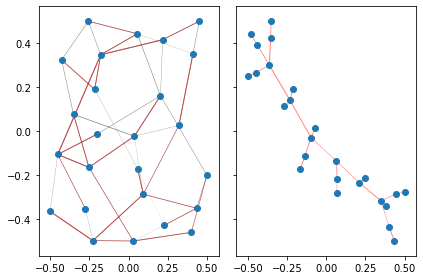

In [16]:
make_tmap()

# Testing with other pairwise relationships

## Load the table containing pairwise relationships

In [12]:
df = pd.read_csv('pairwise_list.txt', sep='\t')
df = df.iloc[:30]

## Create the edge list and weights dictionnary

In [17]:
edge_list = []
weights = {}

# Iterrows for pairwise similiarty score
for index, row in df.iterrows():
    # Create edge list
    edge_list.append([int(row['Query']),np.int64(row['Target']),np.array([np.float(row['Pairwise_Similarity'])])])
    
    # Create dictionnary for weights
    if row['Query'] not in weights:
        weights[row['Query']] = {row['Query'] : np.array([row['Pairwise_Similarity']])}
        
    if row['Query'] in weights:
        weights[row['Query']][row['Target']] = np.array([row['Pairwise_Similarity']])
        

In [18]:
# Checking the type of the object

print(type(edge_list))
print(edge_list)
print('edge_list[5]')
print(type(edge_list[5]))
print(edge_list[5])
print('edge_list[5][0]')
print(type(edge_list[5][0]))
print(edge_list[5][0])
print('edge_list[5][1]')
print(type(edge_list[5][1]))
print(edge_list[5][1])
print('edge_list[5][2')
print(type(edge_list[5][2]))
print(edge_list[5][2])
print(len(edge_list))
print(len(weights))

<class 'list'>
[[2918, 204, array([1.])], [2918, 885, array([0.99])], [2918, 39, array([0.94])], [2918, 191, array([1.])], [2918, 23934, array([0.98])], [2918, 192, array([1.])], [2918, 6984, array([0.99])], [2918, 8277, array([0.99])], [2918, 4510, array([0.99])], [2918, 8812, array([0.7])], [20512, 10049, array([0.98])], [20512, 7419, array([0.94])], [21267, 2939, array([0.78])], [3074, 469, array([0.93])], [3074, 1996, array([0.96])], [3074, 14097, array([0.84])], [3074, 8410, array([0.89])], [3074, 14, array([0.89])], [3074, 13803, array([0.84])], [3074, 23624, array([0.84])], [3074, 2258, array([0.87])], [3074, 3441, array([0.93])], [3074, 2740, array([0.85])], [3074, 3060, array([0.9])], [3074, 16916, array([0.83])], [3074, 177, array([0.95])], [3074, 3350, array([0.93])], [3074, 14827, array([0.94])], [3074, 26, array([0.96])], [14774, 5631, array([0.96])]]
edge_list[5]
<class 'list'>
[2918, 192, array([1.])]
edge_list[5][0]
<class 'int'>
2918
edge_list[5][1]
<class 'numpy.int64

## Computing and plotting the layouts

In [ ]:
# Compute the layout https://tmap.gdb.tools/#simple-graph

x, y, s, t, _ = tm.layout_from_edge_list(int(len(weights)), edge_list, create_mst=False)
x_mst, y_mst, s_mst, t_mst, _ = tm.layout_from_edge_list(int(len(weights)), edge_list, create_mst=True)

_, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

In [1]:
# Plot graph layout with spanning tree superimposed in red
for i in range(len(s)):
    ax1.plot(
        [x[s[i]], x[t[i]]],
        [y[s[i]], y[t[i]]],
        "k-",
        linewidth=weights[s[i]][t[i]],
        alpha=0.5,
        order=1,
        )

for i in range(len(s_mst)):
    ax1.plot(
        [x[s_mst[i]], x[t_mst[i]]],
        [y[s_mst[i]], y[t_mst[i]]],
        "r-",
        linewidth=weights[s_mst[i]][t_mst[i]],
        alpha=0.5,
        zorder=2,
        )

ax1.scatter(x, y, zorder=3)

# Plot spanning tree layout
for i in range(len(s_mst)):
    ax2.plot(
        [x_mst[s_mst[i]], x_mst[t_mst[i]]],
        [y_mst[s_mst[i]], y_mst[t_mst[i]]],
        "r-",
        linewidth=weights[s_mst[i]][t_mst[i]],
        alpha=0.5,
        zorder=1,
        )

ax2.scatter(x_mst, y_mst, zorder=2)

plt.tight_layout()
#plt.savefig("spanning_tree.png")

NameError: name 's' is not defined